In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [86]:
import pandas as pd

train_df=pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df=pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [87]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [89]:
X_train_full=train_df
X_train_full.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [90]:
y_train_full=X_train_full.iloc[:,0]
X_train_full=X_train_full.iloc[:,1:]


In [91]:
y_train_full.head(10)

0     3
1     6
2     2
3     2
4    13
5    16
6     8
7    22
8     3
9     3
Name: label, dtype: int64

In [92]:
y_train_full.value_counts().sort_index()

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

Training data misses label "9" in the sign language.

In [93]:
X_train_full.shape

(27455, 784)

Since both training and testing data misses the label "9",there will be no problem.

When splitting the training data and validation data,all distinct labels should be considered.

In [94]:
X_valid,X_train=X_train_full.iloc[:5491,:]/255,X_train_full.iloc[5491:,:]/255
y_valid,y_train=y_train_full.iloc[:5491],y_train_full.iloc[5491:]


In [95]:
(y_valid.value_counts()/len(y_valid)).sort_index()

0     0.043162
1     0.037698
2     0.043526
3     0.044254
4     0.035148
5     0.042979
6     0.041705
7     0.037334
8     0.041158
10    0.038791
11    0.046804
12    0.038062
13    0.040066
14    0.041705
15    0.038973
16    0.046622
17    0.046804
18    0.046440
19    0.044072
20    0.040612
21    0.041887
22    0.040976
23    0.042979
24    0.038244
Name: label, dtype: float64

In [96]:
(y_train.value_counts()/len(y_train)).sort_index()

0     0.040475
1     0.036560
2     0.041204
3     0.043389
4     0.034784
5     0.044072
6     0.039201
7     0.036787
8     0.042615
10    0.041022
11    0.044801
12    0.038518
13    0.042388
14    0.044027
15    0.039792
16    0.046576
17    0.047214
18    0.042979
19    0.042979
20    0.042706
21    0.038791
22    0.045529
23    0.042251
24    0.041340
Name: label, dtype: float64

A descent sampling to generate training and validation set.

**All data are converted into numpy arrays for ease of visualization of the sign language picture plots.

In [97]:
y_valid=y_valid.to_numpy()
y_train=y_train.to_numpy()

X_train=X_train.to_numpy()
X_valid=X_valid.to_numpy()

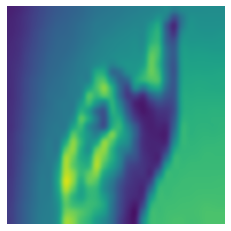

In [98]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(28,28),interpolation="gaussian")
plt.axis("off")
plt.show()

In [99]:
y_train[0] # The above figure is a 7 in sign language.

17

Let us plot to see all the different sign languages.

In [100]:
def index_sign_labels(target):
    labels_index=[None]*25   # to store index of individual labels
    for i in range(len(target)):
        labels_index[target[i]]=i
    return labels_index

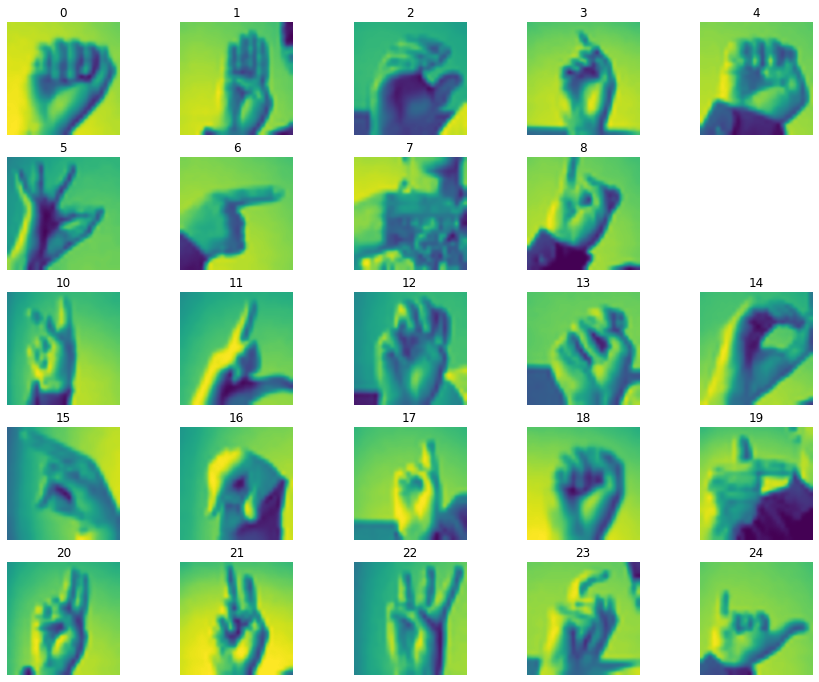

In [101]:
idx=index_sign_labels(y_train)

n_rows=5
n_columns=5

i=0
plt.figure(figsize=(15,12))
for rows in range(n_rows):
    for columns in range(n_columns):
        if i!=9:
            index=n_columns*rows+columns
            plt.subplot(n_rows,n_columns,index+1)
            plt.imshow(X_train[idx[i]].reshape(28,28),interpolation="gaussian")
            plt.axis("off")
            plt.title(i)
        i+=1

In [102]:
import tensorflow as tf
from tensorflow import keras

**Early stopping with patience limit 10 epochs for capturing the best weights.

In [103]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model=keras.models.Sequential([keras.layers.Dense(128,activation='relu',input_shape=[784]),
                               keras.layers.Dense(100,activation='relu'),
                               keras.layers.Dense(100,activation='relu'),
                               keras.layers.Dense(100,activation='relu'),
                               keras.layers.Dense(25,activation='softmax')])

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 25)                2525      
Total params: 136,105
Trainable params: 136,105
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [106]:
history=model.fit(X_train,y_train,epochs=150,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/150
687/687 [==============================] - 2s 2ms/step - loss: 3.0090 - accuracy: 0.1116 - val_loss: 2.7188 - val_accuracy: 0.1683
Epoch 2/150
687/687 [==============================] - 2s 2ms/step - loss: 2.2713 - accuracy: 0.2883 - val_loss: 2.1399 - val_accuracy: 0.3194
Epoch 3/150
687/687 [==============================] - 2s 2ms/step - loss: 1.7455 - accuracy: 0.4395 - val_loss: 1.6144 - val_accuracy: 0.4618
Epoch 4/150
687/687 [==============================] - 2s 2ms/step - loss: 1.4004 - accuracy: 0.5438 - val_loss: 1.4166 - val_accuracy: 0.5292
Epoch 5/150
687/687 [==============================] - 2s 2ms/step - loss: 1.1677 - accuracy: 0.6143 - val_loss: 1.3741 - val_accuracy: 0.5416
Epoch 6/150
687/687 [==============================] - 2s 2ms/step - loss: 0.9964 - accuracy: 0.6728 - val_loss: 0.9681 - val_accuracy: 0.6460
Epoch 7/150
687/687 [==============================] - 2s 2ms/step - loss: 0.8279 - accuracy: 0.7227 - val_loss: 0.9185 - val_accuracy: 0.6833

Epoch 58/150
687/687 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 59/150
687/687 [==============================] - 2s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9996
Epoch 60/150
687/687 [==============================] - 2s 2ms/step - loss: 0.2417 - accuracy: 0.9501 - val_loss: 0.0442 - val_accuracy: 0.9933
Epoch 61/150
687/687 [==============================] - 2s 2ms/step - loss: 0.0110 - accuracy: 0.9998 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 62/150
687/687 [==============================] - 2s 2ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 63/150
687/687 [==============================] - 2s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 64/150
687/687 [==============================] - 2s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy:

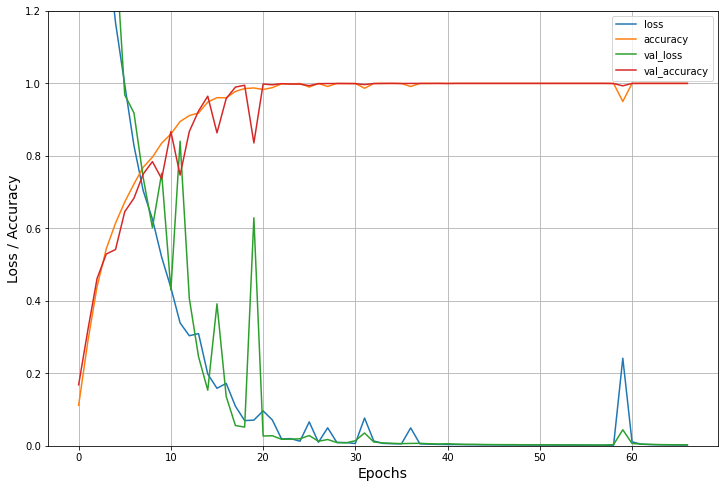

In [112]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.ylim(0,1.2)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Loss / Accuracy",fontsize=14)
plt.show()

In [108]:
X_test_full=test_df

X_test=X_test_full.iloc[:,1:]/255
y_test=X_test_full.iloc[:,0]

X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

model.evaluate(X_test,y_test)

225/225 [==============================] - 0s 1ms/step - loss: 1.4642 - accuracy: 0.7733


[1.4641698598861694, 0.7732849717140198]

Accuracy is not as high as expected.Let us see pick first 10 samples of test set and see the accuracy on them.

**The output of the neural network contains softmax activation function.It produces probablities of all the class.

In [117]:
size=len(y_test)
n_class=24

X_new=X_test[-10:,:]
output_probs=model.predict(X_new)
y_pred=[]

for i in range(10):
    m=output_probs[i][0]
    x=0
    for j in range(1,n_class):
        if output_probs[i][j]>m:
            m=output_probs[i][j]
            x=j
    y_pred.append(x)

y_pred

[18, 4, 14, 8, 4, 20, 18, 2, 4, 2]

In [116]:
y_test[-10:]

array([10,  4, 14,  8, 12,  1, 12,  2,  4,  2])

4 out of last 10 instances in the test set are incorrectly classified.

In [ ]:
y_pred=np.array(y_pred)

In [110]:
acc=sum(y_pred==y_test)/len(y_test)
acc

0.7466536530953709

Inspite of having good validation accuracy,the model does not perform exceptionally in the test set.Let us see the figures in the test set,to check if they are different from training instances. 

Let us plot the test set figures.

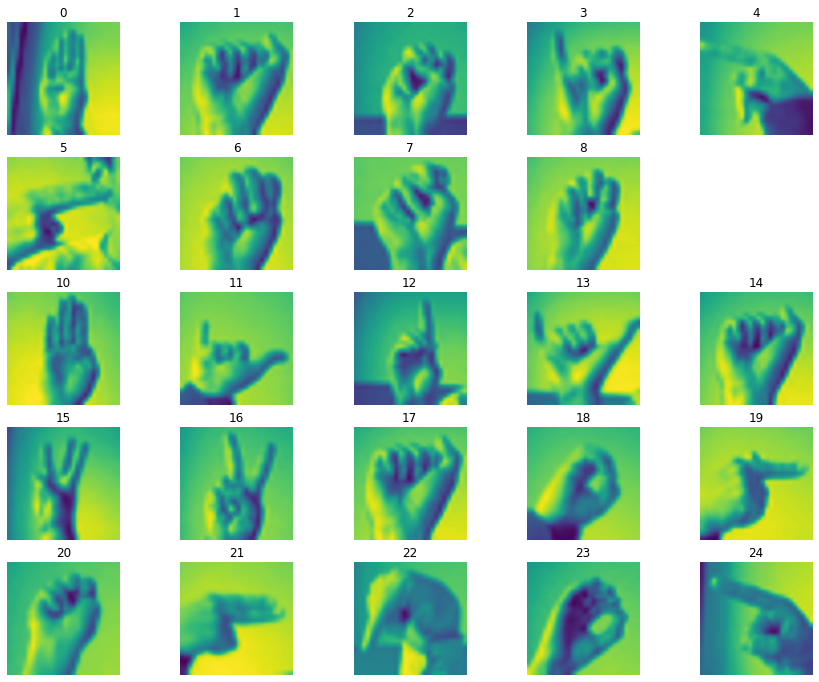

In [120]:
idx=index_sign_labels(y_test)

n_rows=5
n_columns=5

i=0
plt.figure(figsize=(15,12))
for rows in range(n_rows):
    for columns in range(n_columns):
        if i!=9:
            index=n_columns*rows+columns
            plt.subplot(n_rows,n_columns,index+1)
            plt.imshow(X_train[idx[i]].reshape(28,28),interpolation="gaussian")
            plt.axis("off")
            plt.title(i)
        i+=1

****It is clearly evident that the training and testing instances do not match exactly for many target values.Hence is the failure of the model in test set inspite of having excellent validation accuracies inside the training set.****

****If you like my notebook,please upvote and also comment for further improvements.